# **GWU Doctoral Cyber Security Alaytics: Praxis Research**

# **Zero trust reimagined: policy enforcement through AI/ML-based behavioral and predictive models**

## Jody Spearing

## July 2025

## V3.5

In [ ]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np
import gc
from datetime import datetime
import time
import os
from google.colab import drive
import logging
#import cudf
import cupy as cp
from math import comb
from psutil import virtual_memory
import tensorflow as tf
import torch
import cuml
import joblib

# Preprocessing Libraries
from scipy.sparse import hstack
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

#Clustering libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

#Clustering Metrics Libraries
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    fowlkes_mallows_score,
    pairwise_distances,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import skew
from scipy.stats import chi2, chi2_contingency
from scipy.spatial.distance import cdist
from scipy.stats import entropy as scipy_entropy
from scipy.stats import entropy

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.sparse import hstack, csr_matrix
import altair as alt
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Setting Display Options
pd.set_option("display.max.columns", None)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import SGD
#import keras_tuner
import keras



In [ ]:
######################################################################################################################
# get / set working directory
# List Contents of working directory
######################################################################################################################

# Check if drive is already mounted before attempting to mount again
# Use force_remount=True to remount if it is already mounted.
import os
if not os.path.exists('/content/gdrive'):

    drive.mount('/content/gdrive', force_remount=True)
else:
    print("Drive is already mounted.")

!ls "/content/gdrive/My Drive/GWU/Praxis"

Mounted at /content/gdrive
'A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecture Implementations.docx'
'Copy of GWU_PRAXIS_FINAL_JSPEARING.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618F.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618g.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618h.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0621v3.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0621v6.gdoc'
'Copy of Spearing_Jody_Praxis_Draft8_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft9_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft_v05262025v6.docx'
'Copy of Spearing_Jody_Praxis_Draft_v05312025v6 (1).docx'
'Copy of Spearing_Jody_Praxis_Draft_v05312025v6.docx'
'Copy of Spearing_Jody_Praxis_Draft_v060102025v2.gdoc'
'Copy of Spearing_Jody_Praxis_Draft_v060142025v2.gdoc'
'Copy of Spearing_Jody_Praxis_Draft_v060152025v2.gdoc'
'Copy of Spearing_Jody_Praxis_Draft_v060152025v3.gdoc'
'Copy of Spe

In [ ]:
######################################################################################################################
# Load Data file into dataframe 'df_0' denoting original
# Define the path to the Google Drive directory where the dataset is stored
# Define the name of the dataset file
# Combine the path and filename into a full path to the data file
# Optional: Limit the number of rows read for testing large files (commented out)
# nRowsRead random sample used for testing
# Read the CSV file into a pandas DataFrame
# Optionally, you could use nrows=nRowsRead for testing large datasets
# Print the first few rows of the DataFrame to verify that the file was read correctly
# Handle case where the file path is incorrect or file is missing
# Handle case where the CSV file has formatting issues and can't be parsed
# Catch any other unexpected exceptions and print the error message
######################################################################################################################

results_dir = "/content/gdrive/My Drive/GWU/Praxis"
results_data = 'NB15_Results20250728_184706.csv'
results_data_file = results_dir + results_data


In [ ]:
!ls results_dir
!ls "/content/gdrive/My Drive/GWU/Praxis"

ls: cannot access 'results_dir': No such file or directory
'A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecture Implementations.docx'
'Copy of GWU_PRAXIS_FINAL_JSPEARING.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618F.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618g.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618h.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0621v3.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0621v6.gdoc'
'Copy of Spearing_Jody_Praxis_Draft8_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft9_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft_v05262025v6.docx'
'Copy of Spearing_Jody_Praxis_Draft_v05312025v6 (1).docx'
'Copy of Spearing_Jody_Praxis_Draft_v05312025v6.docx'
'Copy of Spearing_Jody_Praxis_Draft_v060102025v2.gdoc'
'Copy of Spearing_Jody_Praxis_Draft_v060142025v2.gdoc'
'Copy of Spearing_Jody_Praxis_Draft_v060152025v2.gdoc'
'Copy of Spearing_Jody_Praxis_Draft

In [ ]:
NB15_drive_path = '/content/gdrive/My Drive/GWU/Praxis/data/UNSW-NB15'
df_NB15_testing = pd.read_csv((NB15_drive_path + '/UNSW_NB15_testing-set.csv'), low_memory=False)
print(df_NB15_testing.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
df_NB15_training = pd.read_csv((NB15_drive_path + '/UNSW_NB15_training-set.csv'), low_memory=False)
print(df_NB15_testing.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
df_NB15_LIST_EVENTS = pd.read_csv((NB15_drive_path + '/UNSW-NB15_LIST_EVENTS.csv'), low_memory=False)
print(df_NB15_LIST_EVENTS.isnull().sum())

Attack category       1
Attack subcategory    1
Number of events      0
dtype: int64


In [ ]:
df_NB15_1 = pd.read_csv((NB15_drive_path + '/UNSW-NB15_1.csv'), low_memory=False)
print(df_NB15_1.isnull().sum())

59.166.0.0            0
1390                  0
149.171.126.6         0
53                    0
udp                   0
CON                   0
0.001055              0
132                   0
164                   0
31                    0
29                    0
0                     0
0.1                   0
dns                   0
500473.9375           0
621800.9375           0
2                     0
2.1                   0
0.2                   0
0.3                   0
0.4                   0
0.5                   0
66                    0
82                    0
0.6                   0
0.7                   0
0.8                   0
0.9                   0
1421927414            0
1421927414.1          0
0.017                 0
0.013                 0
0.10                  0
0.11                  0
0.12                  0
0.13                  0
0.14                  0
0.15                  0
0.16                  0
0.17                  0
3                     0
7               

In [ ]:
df_NB15_2 = pd.read_csv((NB15_drive_path + '/UNSW-NB15_2.csv'), low_memory=False)
print(df_NB15_2.isnull().sum())

59.166.0.0            0
6055                  0
149.171.126.5         0
54145                 0
tcp                   0
FIN                   0
0.072974              0
4238                  0
60788                 0
31                    0
29                    0
7                     0
30                    0
-                     0
458245.4375           0
6571546.5             0
72                    0
72.1                  0
255                   0
255.1                 0
1003293149            0
1003585034            0
59                    0
844                   0
0                     0
0.1                   0
62.04531              0
61.899776             0
1421955842            0
1421955842.1          0
1.02269               0
0.997042              0
0.002317              0
0.002173              0
0.000144              0
0.2                   0
0.3                   0
0.4              285256
0.5              307038
0.6                   0
13                    0
13.1            

In [ ]:
df_NB15_3 = pd.read_csv((NB15_drive_path + '/UNSW-NB15_3.csv'), low_memory=False)
print(df_NB15_3.isnull().sum())

59.166.0.1            0
18247                 0
149.171.126.4         0
7662                  0
tcp                   0
FIN                   0
0.119596              0
4550                  0
68342                 0
31                    0
29                    0
7                     0
33                    0
-                     0
300478.2813           0
4514398.5             0
78                    0
80                    0
255                   0
255.1                 0
1818376620            0
1818657356            0
58                    0
854                   0
0                     0
0.1                   0
87.137592             0
85.643619             0
1424231129            0
1424231129.1          0
1.549156              0
1.50719               0
0.000644              0
0.000521              0
0.000123              0
0.2                   0
0.3                   0
Unnamed: 37      656404
Unnamed: 38      689428
                      0
6                     0
2               

In [ ]:
df_NB15_4 = pd.read_csv((NB15_drive_path + '/UNSW-NB15_4.csv'), low_memory=False)
print(df_NB15_4.isnull().sum())

59.166.0.9            0
7045                  0
149.171.126.7         0
25                    0
tcp                   0
FIN                   0
0.201886              0
37552                 0
3380                  0
31                    0
29                    0
18                    0
8                     0
smtp                  0
1459437.5             0
130766.8672           0
52                    0
42                    0
255                   0
255.1                 0
1422136554            0
3572668484            0
722                   0
80                    0
0                     0
0.1                   0
456.043567            0
15.530109             0
1424250009            0
1424250009.1          0
3.943843              0
4.912488              0
0.00059               0
0.000473              0
0.000117              0
0.2                   0
0.3                   0
Unnamed: 37      406483
Unnamed: 38      433411
                      0
2                     0
2.1             

In [ ]:
df_NB15_features = pd.read_csv(NB15_drive_path + '/NUSW-NB15_features.csv', encoding='cp1252')
print(df_NB15_features.isnull().sum())

No.            0
Name           0
Type           0
Description    0
dtype: int64


In [ ]:
df_NB15_1.columns = df_NB15_features['Name']
df_NB15_2.columns = df_NB15_features['Name']
df_NB15_3.columns = df_NB15_features['Name']
df_NB15_4.columns = df_NB15_features['Name']

In [ ]:
df_NB15_full_train = pd.concat([df_NB15_1, df_NB15_2, df_NB15_3, df_NB15_4], ignore_index=True)

In [ ]:
######################################################################################################################
# Write results csv file to drive
######################################################################################################################
output_dir = "/content/gdrive/My Drive/GWU/Praxis"

def write_labeled_df_tocsv_timestamp(output_file, output_dir):

  try:
    print("Writing the file to ..." + output_dir)
    df_0.to_csv(output_dir, index=False)
    print(f"Dataset written with shape: {df_0.shape}")

  except FileNotFoundError:
      print(f"Error: File not found at {output_dir}")
      return []
  except pd.errors.ParserError:
      print(f"Error: Unable to parse the file at {output_dir}. Check the file format.")
      return []
  except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return []

In [ ]:
######################################################################################################################
#df = df_0.copy()
######################################################################################################################

print(df_NB15_testing.shape)
print(df_NB15_training.shape)
print(df_NB15_LIST_EVENTS.shape)
print(df_NB15_1.shape)
print(df_NB15_2.shape)
print(df_NB15_3.shape)
print(df_NB15_4.shape)
print(df_NB15_features.shape)
print(df_NB15_full_train.shape)

(175341, 45)
(82332, 45)
(208, 3)
(700000, 49)
(700000, 49)
(700000, 49)
(440043, 49)
(49, 4)
(2540043, 49)


In [ ]:
nRowsRead = 100_000
df_NB15_1_sampled = df_NB15_1.sample(n=nRowsRead, random_state=42)
#df_NB15_full_train_sampled = df_NB15_full_train.sample(n=nRowsRead, random_state=42)
#print(df_NB15_full_train.shape)
print(df_NB15_1_sampled.shape)
print("Duplicates in train_df: ",df_NB15_1_sampled.duplicated().sum())
df_NB15_1_sampled_unique = df_NB15_1_sampled.drop_duplicates()
print(df_NB15_1_sampled_unique.shape)

(100000, 49)
Duplicates in train_df:  1898
(98102, 49)


In [ ]:
df_NB15_2_sampled = df_NB15_2.sample(n=nRowsRead, random_state=42)
print(df_NB15_2_sampled.shape)
print("Duplicates in train_df: ",df_NB15_2_sampled.duplicated().sum())
df_NB15_2_sampled_unique = df_NB15_2_sampled.drop_duplicates()
print(df_NB15_2_sampled_unique.shape)

(100000, 49)
Duplicates in train_df:  4247
(95753, 49)


In [ ]:
df_NB15_3_sampled = df_NB15_3.sample(n=nRowsRead, random_state=42)
print(df_NB15_3_sampled.shape)
print("Duplicates in train_df: ",df_NB15_3_sampled.duplicated().sum())
df_NB15_3_sampled_unique = df_NB15_3_sampled.drop_duplicates()
print(df_NB15_3_sampled_unique.shape)

(100000, 49)
Duplicates in train_df:  19853
(80147, 49)


In [ ]:
df_NB15_4_sampled = df_NB15_4.sample(n=nRowsRead, random_state=42)
print(df_NB15_4_sampled.shape)
print("Duplicates in train_df: ",df_NB15_4_sampled.duplicated().sum())
df_NB15_4_sampled_unique = df_NB15_4_sampled.drop_duplicates()
print(df_NB15_4_sampled_unique.shape)

(100000, 49)
Duplicates in train_df:  22081
(77919, 49)


In [ ]:
# Identify the data types of columns
column_data_types = df_NB15_1_sampled.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")



There are 41 Numerical Columns in dataset
There are 8 Categorical Columns in dataset


In [ ]:
#print("Duplicates in train_df: ",df_NB15_full_train_sampled.duplicated().sum())

In [ ]:
#df_NB15_full_train_sampled_unique = df_NB15_full_train_sampled.drop_duplicates()

In [ ]:
#print(df_NB15_full_train_sampled_unique.shape)

(141331, 49)


In [ ]:
#missing_data = df_NB15_full_train_sampled_unique.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
#missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df_NB15_full_train_sampled_unique))*100,2)
#missing_data

In [ ]:
df_NB15_1_sampled_unique['attack_cat'].fillna('normal',inplace = True)
df_NB15_1_sampled_unique['attack_cat'] = df_NB15_1_sampled_unique['attack_cat'].apply(lambda x: x.strip().lower())
df_NB15_1_sampled_unique['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
df_NB15_1_sampled_unique['is_ftp_login'].fillna(0, inplace=True)
df_NB15_1_sampled_unique['ct_ftp_cmd'] = df_NB15_1_sampled_unique['ct_ftp_cmd'].astype('str')
df_NB15_1_sampled_unique['ct_ftp_cmd'].dtype
df_NB15_1_sampled_unique['ct_ftp_cmd'].unique()
df_NB15_1_sampled_unique['ct_ftp_cmd'] = df_NB15_1_sampled_unique['ct_ftp_cmd'].replace(' ', '0')
df_NB15_1_sampled_unique['ct_ftp_cmd'] = df_NB15_1_sampled_unique['ct_ftp_cmd'].astype('int')

In [ ]:
df_NB15_2_sampled_unique['attack_cat'].fillna('normal',inplace = True)
df_NB15_2_sampled_unique['attack_cat'] = df_NB15_2_sampled_unique['attack_cat'].apply(lambda x: x.strip().lower())
df_NB15_2_sampled_unique['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
df_NB15_2_sampled_unique['is_ftp_login'].fillna(0, inplace=True)
df_NB15_2_sampled_unique['ct_ftp_cmd'] = df_NB15_2_sampled_unique['ct_ftp_cmd'].astype('str')
df_NB15_2_sampled_unique['ct_ftp_cmd'].dtype
df_NB15_2_sampled_unique['ct_ftp_cmd'].unique()
df_NB15_2_sampled_unique['ct_ftp_cmd'] = df_NB15_2_sampled_unique['ct_ftp_cmd'].replace(' ', '0')
df_NB15_2_sampled_unique['ct_ftp_cmd'] = df_NB15_2_sampled_unique['ct_ftp_cmd'].astype('int')


In [ ]:
df_NB15_3_sampled_unique['attack_cat'].fillna('normal',inplace = True)
df_NB15_3_sampled_unique['attack_cat'] = df_NB15_3_sampled_unique['attack_cat'].apply(lambda x: x.strip().lower())
df_NB15_3_sampled_unique['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
df_NB15_3_sampled_unique['is_ftp_login'].fillna(0, inplace=True)
df_NB15_3_sampled_unique['ct_ftp_cmd'] = df_NB15_3_sampled_unique['ct_ftp_cmd'].astype('str')
df_NB15_3_sampled_unique['ct_ftp_cmd'].dtype
df_NB15_3_sampled_unique['ct_ftp_cmd'].unique()
df_NB15_3_sampled_unique['ct_ftp_cmd'] = df_NB15_3_sampled_unique['ct_ftp_cmd'].replace(' ', '0')
df_NB15_3_sampled_unique['ct_ftp_cmd'] = df_NB15_3_sampled_unique['ct_ftp_cmd'].astype('int')

In [ ]:
df_NB15_4_sampled_unique['attack_cat'].fillna('normal',inplace = True)
df_NB15_4_sampled_unique['attack_cat'] = df_NB15_4_sampled_unique['attack_cat'].apply(lambda x: x.strip().lower())
df_NB15_4_sampled_unique['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
df_NB15_4_sampled_unique['is_ftp_login'].fillna(0, inplace=True)
df_NB15_4_sampled_unique['ct_ftp_cmd'] = df_NB15_4_sampled_unique['ct_ftp_cmd'].astype('str')
df_NB15_4_sampled_unique['ct_ftp_cmd'].dtype
df_NB15_4_sampled_unique['ct_ftp_cmd'].unique()
df_NB15_4_sampled_unique['ct_ftp_cmd'] = df_NB15_4_sampled_unique['ct_ftp_cmd'].replace(' ', '0')
df_NB15_4_sampled_unique['ct_ftp_cmd'] = df_NB15_4_sampled_unique['ct_ftp_cmd'].astype('int')

In [ ]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df

In [ ]:
column = 'is_ftp_login'
convert_to_binary(df_NB15_1_sampled_unique, column)
convert_to_binary(df_NB15_2_sampled_unique, column)
convert_to_binary(df_NB15_3_sampled_unique, column)
convert_to_binary(df_NB15_4_sampled_unique, column)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
178777,149.171.126.14,1043,175.45.176.1,53,udp,INT,0.000003,264,0,60,0,0,0,dns,3.520000e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424254605,1424254605,0.003000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0,0,39,39,18,18,18,18,39,normal,0
178937,149.171.126.14,1043,175.45.176.1,53,udp,INT,0.000007,264,0,60,0,0,0,dns,1.508571e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424254608,1424254608,0.007000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0,0,42,42,42,42,42,23,42,normal,0
339242,59.166.0.8,54347,149.171.126.1,25541,tcp,FIN,0.372510,4296,3080,31,29,7,7,-,8.897480e+04,6.395533e+04,28,30,255,255,906224374,960736033,153,103,0,0,717.031471,17.657607,1424259657,1424259658,13.784815,12.825448,0.000712,0.000569,0.000143,0,0,0.0,0,0,3,5,4,1,1,1,1,normal,0
314795,149.171.126.10,47439,175.45.176.0,53,udp,INT,0.000005,264,0,60,0,0,0,dns,2.112000e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424259081,1424259081,0.005000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0,0,42,42,42,42,42,16,42,normal,0
239837,175.45.176.2,26297,149.171.126.15,80,tcp,FIN,0.725453,910,268,254,252,2,1,http,9.031598e+03,2.470181e+03,10,6,255,255,2387012997,1076661095,91,45,1,0,4233.986203,173.456797,1424256539,1424256540,72.578333,123.185398,0.179702,0.109517,0.070185,0,1,1.0,0,0,1,1,1,2,1,1,1,reconnaissance,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242157,59.166.0.2,24161,149.171.126.4,8998,tcp,FIN,0.009790,424,8824,31,29,1,4,ftp-data,3.031665e+05,6.610010e+06,8,12,255,255,602429755,610335450,53,735,0,0,102.794898,47.094628,1424256636,1424256636,1.351143,0.846364,0.000599,0.000477,0.000122,0,0,0.0,0,0,3,3,5,6,1,1,4,normal,0
394347,59.166.0.8,21118,149.171.126.8,63306,tcp,FIN,0.016903,2542,21450,31,29,7,14,-,1.173283e+06,9.910667e+06,40,42,255,255,2702265470,2737345001,64,511,0,0,0.000000,23.324592,1424260895,1424260895,0.425154,0.398634,0.000840,0.000556,0.000284,0,0,0.0,0,0,3,3,3,5,1,1,2,normal,0
238581,59.166.0.7,65422,149.171.126.4,53,udp,CON,0.001038,146,178,31,29,0,0,dns,5.626204e+05,6.859345e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424256490,1424256490,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,4,3,2,1,1,1,2,normal,0
27948,59.166.0.2,53809,149.171.126.5,22,tcp,FIN,0.005874,3728,5474,31,29,7,7,ssh,4.919306e+06,7.144706e+06,32,24,255,255,479752197,2629559595,117,228,0,0,0.000000,0.335476,1424251127,1424251127,0.189484,0.228043,0.000635,0.000510,0.000125,0,0,0.0,0,0,2,1,1,3,2,1,4,normal,0


In [ ]:
#Converting in string first to ensure consistency
df_NB15_1_sampled_unique['sport'] = df_NB15_1_sampled_unique['sport'].astype('str')
# Handling non-integer values or NaNs
df_NB15_1_sampled_unique['sport'] = pd.to_numeric(df_NB15_1_sampled_unique['sport'], errors='coerce').fillna(0).astype(int)
#Converting in string first to ensure consistency
df_NB15_1_sampled_unique['dsport'] = df_NB15_1_sampled_unique['dsport'].astype('str')
# Handling non-integer values or NaNs
df_NB15_1_sampled_unique['dsport'] = pd.to_numeric(df_NB15_1_sampled_unique['dsport'], errors='coerce').fillna(0).astype(int)

In [ ]:
#Converting in string first to ensure consistency
df_NB15_2_sampled_unique['sport'] = df_NB15_2_sampled_unique['sport'].astype('str')
# Handling non-integer values or NaNs
df_NB15_2_sampled_unique['sport'] = pd.to_numeric(df_NB15_2_sampled_unique['sport'], errors='coerce').fillna(0).astype(int)
#Converting in string first to ensure consistency
df_NB15_2_sampled_unique['dsport'] = df_NB15_2_sampled_unique['dsport'].astype('str')
# Handling non-integer values or NaNs
df_NB15_2_sampled_unique['dsport'] = pd.to_numeric(df_NB15_2_sampled_unique['dsport'], errors='coerce').fillna(0).astype(int)

In [ ]:
#Converting in string first to ensure consistency
df_NB15_3_sampled_unique['sport'] = df_NB15_3_sampled_unique['sport'].astype('str')
# Handling non-integer values or NaNs
df_NB15_3_sampled_unique['sport'] = pd.to_numeric(df_NB15_3_sampled_unique['sport'], errors='coerce').fillna(0).astype(int)
#Converting in string first to ensure consistency
df_NB15_3_sampled_unique['dsport'] = df_NB15_3_sampled_unique['dsport'].astype('str')
# Handling non-integer values or NaNs
df_NB15_3_sampled_unique['dsport'] = pd.to_numeric(df_NB15_3_sampled_unique['dsport'], errors='coerce').fillna(0).astype(int)

In [ ]:
#Converting in string first to ensure consistency
df_NB15_4_sampled_unique['sport'] = df_NB15_4_sampled_unique['sport'].astype('str')
# Handling non-integer values or NaNs
df_NB15_4_sampled_unique['sport'] = pd.to_numeric(df_NB15_4_sampled_unique['sport'], errors='coerce').fillna(0).astype(int)
#Converting in string first to ensure consistency
df_NB15_4_sampled_unique['dsport'] = df_NB15_4_sampled_unique['dsport'].astype('str')
# Handling non-integer values or NaNs
df_NB15_4_sampled_unique['dsport'] = pd.to_numeric(df_NB15_4_sampled_unique['dsport'], errors='coerce').fillna(0).astype(int)

In [ ]:
######################################################################################################################
# Visualization of Heatmap
# Define a function to plot a heatmap of clustering performance metrics across encoding types
# Parameters:
# - results_df: DataFrame containing clustering results and metrics
# - metrics_to_plot: list of metric names to include in the heatmap (optional)
# If no specific metrics are provided, use a default subset of key metrics
# Group the results by Encoding Type and compute the mean of the selected metrics
# Set the size of the figure for the heatmap
# Create the heatmap using seaborn
# - annot=True shows the metric values inside the cells
# - fmt=".2f" formats numbers to 2 decimal places
# - cmap sets the color map (YlGnBu: Yellow-Green-Blue)
######################################################################################################################

# === Heatmap plot ===
def plot_heatmap(results_df, metrics_to_plot=None):
    if metrics_to_plot is None:
        metrics_to_plot = [
            'Silhouette Score',
            'Davies-Bouldin Index',
            'Calinski-Harabasz Index',
            'Noise Ratio',
            'Core Point Ratio',
            'Avg Intra-Cluster Distance'
        ]
    df_plot = results_df.reset_index()
    df_plot[['Set', 'Encoding']] = df_plot['index'].str.extract(r'(\w+) \((.+)\)')
    for metric in metrics_to_plot:
        df_plot[metric] = pd.to_numeric(df_plot[metric], errors='coerce')
    grouped = df_plot.groupby('Encoding')[metrics_to_plot].mean().astype(float)
    plt.figure(figsize=(10, 6))
    sns.heatmap(grouped, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Clustering Metrics by Encoding Type (Averaged Across Splits)")
    plt.ylabel("Encoding Type")
    plt.xlabel("Metric")
    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
# === Cluster visualization ===
######################################################################################################################

def plot_clusters(data_scaled, labels, grid_size, encoding_type, split_label="Train"):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data_scaled[:len(labels)])
    clustered_df = pd.DataFrame({
        'Cluster': labels,
        'PCA1': reduced_data[:, 0],
        'PCA2': reduced_data[:, 1]
    })
    plt.figure(figsize=(10, 6))
    for cluster in sorted(clustered_df['Cluster'].unique()):
        subset = clustered_df[clustered_df['Cluster'] == cluster]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)
    plt.title(f'Cluster Visualization - {encoding_type} ({split_label}) | Grid: {grid_size[0]}x{grid_size[1]}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster')
    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
# Visualization of Metrics Function
# Define a function to create a bar chart of clustering metrics across encoding types
# Parameters:
# - results_df: DataFrame containing clustering results and metrics
# - sort_by: metric to sort the bars by (default is 'Silhouette Score')
# Sort the results by the selected metric in descending order and set 'Encoding Type' as the index
# Plot the DataFrame as a bar chart
# Customize chart title and axis labels
# Rotate x-axis labels for better readability
# Place legend in the upper-left corner
# Adjust layout to fit elements nicely
# Show the plot
######################################################################################################################


def plot_metrics(results_df, sort_by='Silhouette Score'):
    # Reset index to expose 'Train/Test/Validation (Encoder)' as a column
    df_plot = results_df.reset_index()

    # Extract 'Set' and 'Encoder' from the index
    df_plot[['Set', 'Encoding']] = df_plot['index'].str.extract(r'(\w+)\s+\((.+)\)')

    # Pivot to make 'Encoding' the x-axis and show bars by 'Set'
    pivot = df_plot.pivot(index='Encoding', columns='Set', values=sort_by)

    # Plot
    pivot.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{sort_by} by Encoding Type and Data Split')
    plt.ylabel(sort_by)
    plt.xlabel('Encoding Type')
    plt.xticks(rotation=0)
    plt.legend(title='Data Split', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
#df = df_NB15_full_train_sampled_unique.copy()
#df = df_NB15_1_sampled_unique.copy()
#df = df_NB15_2_sampled_unique.copy()
#df = df_NB15_3_sampled_unique.copy()
df = df_NB15_4_sampled_unique.copy()
df.shape

(77919, 49)

In [ ]:

# === Parameters ===
categorical_cols = ['srcip', 'dstip', 'proto', 'state']
numeric_cols = ['dur', 'sbytes', 'dbytes', 'sloss', 'dloss', 'Sload', 'Dload']
n_features = 64
n_clusters = 10

# === Encoders ===
def encode_featurehasher(df_subset):
    hasher = FeatureHasher(n_features=n_features, input_type='string')
    hashed = hasher.transform(df_subset[categorical_cols].astype(str).to_dict(orient='records'))
    numeric = df_subset[numeric_cols].fillna(0).values
    return hstack([hashed, csr_matrix(numeric)])

def encode_labelencoder(df_subset):
    df_encoded = df_subset.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    return df_encoded[numeric_cols + categorical_cols].fillna(0).values

def reduce_and_scale(X_train, X_test, X_val, requested_svd_components=20):
    max_components = min(requested_svd_components, X_train.shape[1])
    svd = TruncatedSVD(n_components=max_components, random_state=42)
    scaler = StandardScaler()

    X_train_reduced = svd.fit_transform(X_train)
    X_test_reduced = svd.transform(X_test)
    X_val_reduced = svd.transform(X_val)

    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)
    X_val_scaled = scaler.transform(X_val_reduced)

    return X_train_scaled, X_test_scaled, X_val_scaled

# === Extra Metrics ===
def avg_inter_cluster_distance(X, labels):
    centroids = []
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
    return np.mean(pairwise_distances(centroids)) if len(centroids) > 1 else np.nan

def coherence_score(X, labels):
    scores = []
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            centroid = cluster_points.mean(axis=0)
            distances = pairwise_distances(cluster_points, [centroid])
            scores.append(np.mean(distances))
    return np.mean(scores) if scores else np.nan

def cluster_entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    return entropy(probs)

# === Evaluation Function ===
def run_ahc_and_evaluate(X_train, X_test, X_val, encoding_name, df_train, df_test, df_val):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels_train = model.fit_predict(X_train)
    labels_test = model.fit_predict(X_test)
    labels_val = model.fit_predict(X_val)

    # Attach AHC labels to the original data
    df_train['AHC_Label'] = labels_train
    df_test['AHC_Label'] = labels_test
    df_val['AHC_Label'] = labels_val

    # Combine and save
    df_combined = pd.concat([df_train, df_test, df_val])
    df_combined.reset_index(drop=True, inplace=True)
    df_combined.to_csv("unsw_nb15_4_with_ahc_labels_150k.csv", index=False)
    print("✅ Saved: 'unsw_nb15_4_with_ahc_labels_150k.csv' with AHC_Label column.")
    #print(f"✅ Saved to: {output_path}")

    results = {}
    for name, data, labels, df_split in zip(
        ['Train', 'Test', 'Validation'],
        [X_train, X_test, X_val],
        [labels_train, labels_test, labels_val],
        [df_train, df_test, df_val]
    ):
        if 'Label' in df_split.columns:
            true_labels = df_split['Label']
            ari = adjusted_rand_score(true_labels, labels)
            nmi = normalized_mutual_info_score(true_labels, labels)
            fmi = fowlkes_mallows_score(true_labels, labels)
        else:
            ari, nmi, fmi = np.nan, np.nan, np.nan

        results[f'{name} ({encoding_name})'] = {
            'Silhouette Score': silhouette_score(data, labels),
            'Calinski-Harabasz Index': calinski_harabasz_score(data, labels),
            'Davies-Bouldin Index': davies_bouldin_score(data, labels),
            'Adjusted Rand Index': ari,
            'NMI': nmi,
            'FMI': fmi,
            'Avg Inter-Cluster Distance': avg_inter_cluster_distance(data, labels),
            'Coherence': coherence_score(data, labels),
            'Entropy': cluster_entropy(labels)
        }
    return pd.DataFrame(results).T

# === Optional: Metric Plotting Function ===
def plot_metrics(results_df, sort_by='Silhouette Score'):
    df_plot = results_df.reset_index()
    df_plot[['Set', 'Encoding']] = df_plot['index'].str.extract(r'(\w+)\s+\((.+)\)')
    pivot = df_plot.pivot(index='Encoding', columns='Set', values=sort_by)
    pivot.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{sort_by} by Encoding Type and Data Split')
    plt.ylabel(sort_by)
    plt.xlabel('Encoding Type')
    plt.xticks(rotation=0)
    plt.legend(title='Data Split', loc='upper right')
    plt.tight_layout()
    plt.show()

# === Main Execution ===
def main(df):
    df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42)
    df_test, df_val = train_test_split(df_temp, test_size=1/3, random_state=42)

    # LabelEncoder
    X_train_le = encode_labelencoder(df_train)
    X_test_le = encode_labelencoder(df_test)
    X_val_le = encode_labelencoder(df_val)
    X_train_le_scaled, X_test_le_scaled, X_val_le_scaled = reduce_and_scale(X_train_le, X_test_le, X_val_le)
    results_le = run_ahc_and_evaluate(X_train_le_scaled, X_test_le_scaled, X_val_le_scaled, "LabelEncoder", df_train, df_test, df_val)

    # FeatureHasher
    X_train_fh = encode_featurehasher(df_train)
    X_test_fh = encode_featurehasher(df_test)
    X_val_fh = encode_featurehasher(df_val)
    X_train_fh_scaled, X_test_fh_scaled, X_val_fh_scaled = reduce_and_scale(X_train_fh, X_test_fh, X_val_fh)
    results_fh = run_ahc_and_evaluate(X_train_fh_scaled, X_test_fh_scaled, X_val_fh_scaled, "FeatureHasher", df_train, df_test, df_val)

    # Combine results
    combined_results = pd.concat([results_le, results_fh])
    print(combined_results)

    # Optional: Visualize
    plot_metrics(combined_results, sort_by='Silhouette Score')
    plot_metrics(combined_results, sort_by='Adjusted Rand Index')
    plot_metrics(combined_results, sort_by='Avg Inter-Cluster Distance')
    return combined_results

# === Example usage ===
# df = pd.read_csv("UNSW-NB15_1.csv")
# combined_results = main(df)

✅ Saved: 'unsw_nb15_4_with_ahc_labels_150k.csv' with AHC_Label column.
✅ Saved: 'unsw_nb15_4_with_ahc_labels_150k.csv' with AHC_Label column.
                            Silhouette Score  Calinski-Harabasz Index  \
Train (LabelEncoder)                0.358509             10860.084170   
Test (LabelEncoder)                 0.386494              3364.677391   
Validation (LabelEncoder)           0.382267              2022.049311   
Train (FeatureHasher)               0.577380             27424.518761   
Test (FeatureHasher)                0.565060              6402.422288   
Validation (FeatureHasher)          0.517048              4905.394586   

                            Davies-Bouldin Index  Adjusted Rand Index  \
Train (LabelEncoder)                    0.893465             0.039991   
Test (LabelEncoder)                     0.858537             0.061522   
Validation (LabelEncoder)               0.911756             0.069832   
Train (FeatureHasher)                   0.602436      

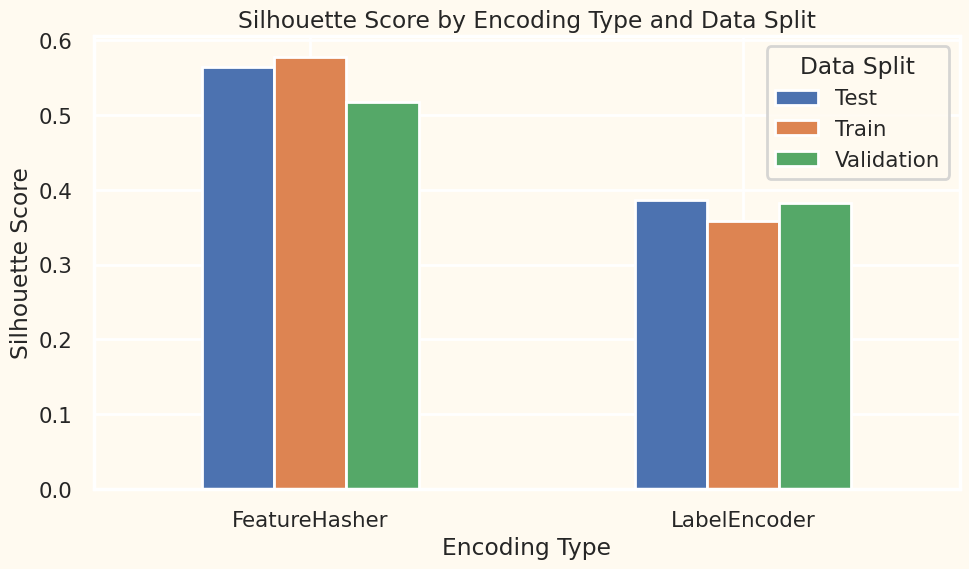

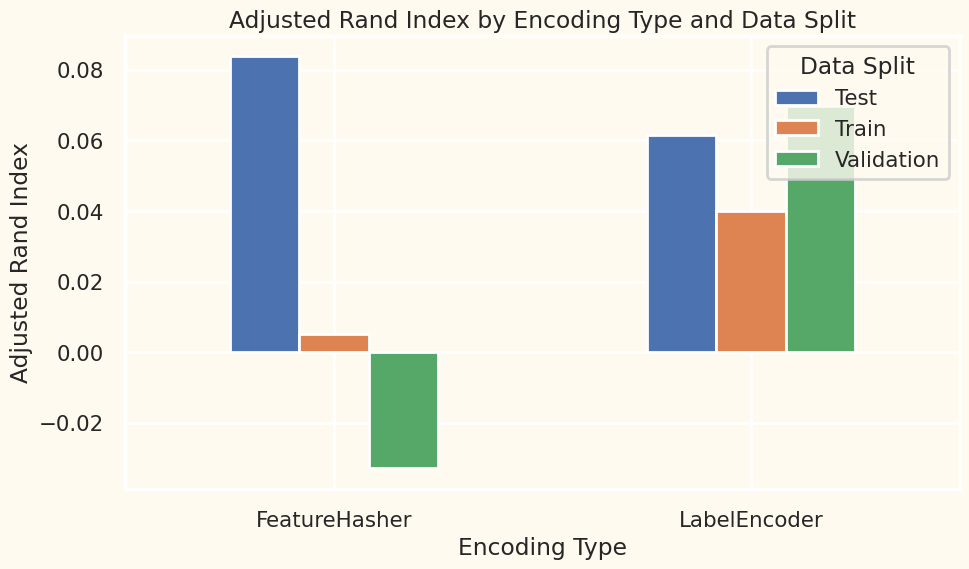

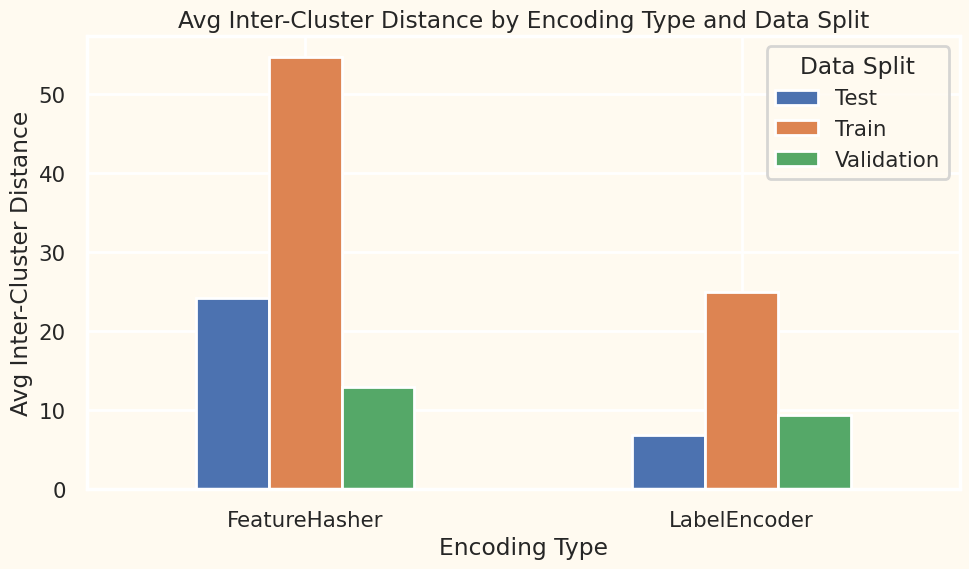

In [ ]:
######################################################################################################################
# Main function
######################################################################################################################

if __name__ == '__main__':
    combined_results = main(df)

In [ ]:
# Load pre-labeled data
#!ls "/content/gdrive/My Drive/GWU/Praxis"
#df = combined_results.copy()
from google.colab import files
files.download("unsw_nb15_4_with_ahc_labels_150k.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#NB15_drive_path = '/content/gdrive/My Drive/GWU/Praxis/data'
NB15_drive_path = '/content/gdrive/My Drive/GWU/Praxis/data/UNSW-NB15'
#NB15_drive_path + '/UNSW-NB15_4.csv'
df_NB15_3_base_results = pd.read_csv((NB15_drive_path + '/unsw_nb15_3_with_ahc_labels_150k.csv'), low_memory=False)


In [ ]:
!ls NB15_drive_path

ls: cannot access 'NB15_drive_path': No such file or directory


In [ ]:
df = df_NB15_3_base_results.copy()
df.shape

(80147, 50)

In [ ]:
from tensorflow.keras.utils import to_categorical
from scipy.stats import binomtest

# === Load and Prepare Data ===
#df = pd.read_csv("unsw_nb15_with_ahc_labels_150k.csv")

categorical_cols = ['srcip', 'dstip', 'proto', 'state']
numeric_cols = ['dur', 'sbytes', 'dbytes', 'sloss', 'dloss', 'Sload', 'Dload']

df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

X_raw = df_encoded[numeric_cols + categorical_cols].fillna(0).values
svd = TruncatedSVD(n_components=min(20, X_raw.shape[1]), random_state=42)
scaler = StandardScaler()
X_reduced = svd.fit_transform(X_raw)
X_scaled = scaler.fit_transform(X_reduced)

X = X_scaled
y_labels = df['AHC_Label'].values
X_train, X_val, y_train, y_val = train_test_split(X, y_labels, test_size=0.3, random_state=42, stratify=y_labels)
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# === Build and Train FFNN Model ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_labels)), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_data=(X_val, y_val_cat), verbose=0)

# === Prediction and Thresholding ===
probs = model.predict(X_val)
y_pred = probs.argmax(axis=1)
confidences = probs.max(axis=1)
correct_mask = (y_val == y_pred).astype(int)
fpr, tpr, thresholds = roc_curve(correct_mask, confidences)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
binary_preds = (confidences >= optimal_threshold).astype(int)  # 1 = allowed

# === Add 'allowed' Column ===
val_indices = np.arange(len(y_val))
df_val = df.iloc[val_indices].copy()
df_val['allowed'] = binary_preds

# === One-Tailed Test on Attack Filtering (H3) ===
attack_df = df_val[df_val['Label'] == 1]  # assuming 'Label' = 1 is attack
n_attacks = len(attack_df)
n_allowed_attacks = attack_df['allowed'].sum()
p_value = binomtest(n_allowed_attacks, n_attacks, p=0.01, alternative='greater').pvalue

# === Save Predictions ===
df_val.to_csv("unsw_nb15_with_predictions.csv", index=False)

# === Print Results ===
print("Total Attacks in Validation:", n_attacks)
print("Attacks Allowed (False Negative):", n_allowed_attacks)
print("Allowed Rate:", round(n_allowed_attacks / n_attacks, 5) if n_attacks > 0 else 'N/A')
print("One-tailed p-value (H0: ≥1% allowed):", p_value)
print("Statistically Significant (p < 0.05):", p_value < 0.05)

752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total Attacks in Validation: 3620
Attacks Allowed (False Negative): 2038
Allowed Rate: 0.56298
One-tailed p-value (H0: ≥1% allowed): 0.0
Statistically Significant (p < 0.05): True


In [ ]:
# === Step 11: Hypothesis 3 - One-Tailed Binomial Test for Attack Allowance ===
from scipy.stats import binomtest

# Count total attack connections in the full dataset (original df)
total_attack_connections = df[df['Label'].str.lower() == 'attack'].shape[0]

# Extract false negatives from results
FN = fn

# Null hypothesis: more than 1% of attack connections would be allowed (FNR >= 1%)
# One-tailed binomial test: H0: p >= 0.01 vs H1: p < 0.01
p0 = 0.01
binom_result = binomtest(FN, n=total_attack_connections, p=p0, alternative='less')

# Append test results to the results_df
results_df['Total_Attack_Connections'] = total_attack_connections
results_df['Hyp3_OneTailed_p_value'] = binom_result.pvalue
results_df['Reject_H0_FNR>=1%'] = binom_result.pvalue < 0.05

# Save updated file
results_df.to_csv("ffnn_evaluation_metrics_with_hyp3.csv", index=False)
print("Updated evaluation with Hypothesis 3 test saved to 'ffnn_evaluation_metrics_with_hyp3.csv'")
print(results_df[['Total_Attack_Connections', 'FN', 'Hyp3_OneTailed_p_value', 'Reject_H0_FNR>=1%']])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve, auc, confusion_matrix, top_k_accuracy_score,
    adjusted_rand_score, roc_curve
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from scipy.stats import entropy as scipy_entropy, binomtest
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Load data
df = pd.read_csv("unsw_nb15_with_ahc_labels_150k.csv")

# Configuration
categorical_cols = ['srcip', 'dstip', 'proto', 'state']
numeric_cols = ['dur', 'sbytes', 'dbytes', 'sloss', 'dloss', 'Sload', 'Dload']

# Encode categorical columns
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Combine features
X_raw = df_encoded[numeric_cols + categorical_cols].fillna(0).values

# Reduce and scale
svd = TruncatedSVD(n_components=min(20, X_raw.shape[1]), random_state=42)
scaler = StandardScaler()
X_reduced = svd.fit_transform(X_raw)
X_scaled = scaler.fit_transform(X_reduced)

# Define target (AHC clusters)
X = X_scaled
y_labels = df['AHC_Label'].values

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y_labels, test_size=0.3, random_state=42, stratify=y_labels)
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# FNN/MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_labels)), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_data=(X_val, y_val_cat), verbose=0)

# Predict and evaluate
probs = model.predict(X_val)
y_pred = probs.argmax(axis=1)
y_true = y_val

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(to_categorical(y_true), probs, multi_class='ovr')
d_prec, d_rec, _ = precision_recall_curve(to_categorical(y_true).ravel(), probs.ravel())
pr_auc = auc(d_rec, d_prec)
topk_acc = top_k_accuracy_score(y_true, probs, k=3)
cm = confusion_matrix(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Thresholding
confidences = probs.max(axis=1)
correct_mask = (y_true == y_pred).astype(int)
fpr, tpr, thresholds = roc_curve(correct_mask, confidences)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
binary_preds = (confidences >= optimal_threshold).astype(int)

# Save decisions to DataFrame
df_val = df.iloc[y_val.index if hasattr(y_val, 'index') else np.arange(len(y_val))].copy()
df_val['Allowed'] = binary_preds

# === One-Tailed Hypothesis Test ===
# H₀: p ≥ 1% attack pass-through (fail-safe)
# H₁: p < 1% (safe; effective protection)

attack_total = df[df['Label'] == 'Attack'].shape[0]
attack_allowed = df_val[(df_val['Label'] == 'Attack') & (df_val['Allowed'] == 1)].shape[0]

binom_result = binomtest(k=attack_allowed, n=attack_total, p=0.01, alternative='less')

print(f"Total Attack Samples: {attack_total}")
print(f"Attacks Allowed Through: {attack_allowed}")
print(f"p-value (one-tailed): {binom_result.pvalue:.6f}")
print("Result:", "✅ Statistically Significant" if binom_result.pvalue < 0.05 else "❌ Not Statistically Significant")

# === Save Evaluation Metrics ===
metrics = {
    'Timestamp': datetime.now().isoformat(timespec='seconds'),
    'Model': 'FFNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc,
    'Top-3 Accuracy': topk_acc,
    'ARI': ari,
    'TPR': tpr[optimal_idx],
    'FPR': fpr[optimal_idx],
    'Optimal Threshold': optimal_threshold,
    'Attacks Allowed': attack_allowed,
    'Total Attacks': attack_total,
    'p-value (1-tailed)': binom_result.pvalue
}
results_df = pd.DataFrame([metrics])
results_df.to_csv("ffnn_hypothesis_results.csv", index=False)
print("📁 Results saved to 'ffnn_hypothesis_results.csv'")